## <p align=center> **Analisis estadistico con Arima (modelo con mejor desempeño general)** <p>

In [150]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

In [151]:
df_colombia = pd.read_csv('dataset_ML_TS_hnr/colombia.csv',index_col=0,parse_dates=True)

In [152]:
X = df_colombia.values
print('Shape of data \t',df_colombia.shape)
print('Original Dataset:\n',df_colombia.head())
print('After Extracting values:\n',X)

Shape of data 	 (62, 1)
Original Dataset:
             colombia
years               
1960-01-01  -49098.0
1961-01-01  -49408.0
1962-01-01  -51733.0
1963-01-01  -54423.0
1964-01-01  -55765.0
After Extracting values:
 [[-49098.]
 [-49408.]
 [-51733.]
 [-54423.]
 [-55765.]
 [-53597.]
 [-61249.]
 [-58937.]
 [-63183.]
 [-66191.]
 [-66058.]
 [-84692.]
 [-77748.]
 [-75658.]
 [-80843.]
 [-84511.]
 [-98130.]
 [-67662.]
 [-67880.]
 [-63678.]
 [-49253.]
 [-56188.]
 [-46855.]
 [-29939.]
 [-34909.]
 [-35855.]
 [-48299.]
 [-44372.]
 [-32292.]
 [-27370.]
 [-17237.]
 [-48488.]
 [-29969.]
 [-30020.]
 [-16033.]
 [-33016.]
 [-28154.]
 [-23520.]
 [-25134.]
 [-30850.]
 [-31116.]
 [-27618.]
 [-24379.]
 [-33007.]
 [-25907.]
 [-41348.]
 [-39142.]
 [-49575.]
 [-63246.]
 [-46902.]
 [-34185.]
 [-46273.]
 [-55913.]
 [-64686.]
 [-67516.]
 [-41064.]
 [ 79978.]
 [415618.]
 [494364.]
 [395803.]
 [229437.]
 [211978.]]


<AxesSubplot: xlabel='years'>

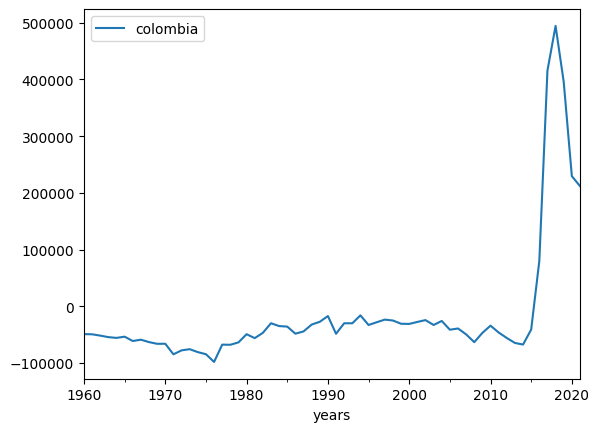

In [153]:
df_colombia.plot()

### <p align=center> **OBSERVACIONES - ANALISIS PREVIO** <p>

#### **CHECK FOR STATIONALITY**

In [154]:
from statsmodels.tsa.stattools import adfuller  

In [155]:
df_colombia_test = adfuller(df_colombia['colombia'], autolag='AIC')

result = adfuller(df_colombia['colombia'])
print("1. ADF : ",df_colombia_test[0])
print("2. P-Value : ", df_colombia_test[1])
print("3. Num Of Lags : ", df_colombia_test[2])
print("4. Num Of Observations Used For ADF Regression:",      df_colombia_test[3])
print("5. Critical Values :")
for key, val in df_colombia_test[4].items():
    print("\t",key, ": ", val)
if result[1] <= 0.05:
        print('El valor de p es menor a 0.05, lo que significa que podemos recharzar la hipótesis nula H0. Podemos concluir que los datos no tienen raíz unitaria y son estacionarios.')
else:
    print('Evidencia débil contra la hipótesis nula, lo cual significa que la serie de tiempo tiene una raíz unitaria que indica que no es estacionaria.')

1. ADF :  1.034863391684134
2. P-Value :  0.9946205114343322
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression: 58
5. Critical Values :
	 1% :  -3.548493559596539
	 5% :  -2.912836594776334
	 10% :  -2.594129155766944
Evidencia débil contra la hipótesis nula, lo cual significa que la serie de tiempo tiene una raíz unitaria que indica que no es estacionaria.


In [156]:
# no podemos usar datos no estacionarios para predecir, especialmente cuando usamos un modelo AR

### `Diferenciación del Dataset`

La diferenciación ($\Delta^n$) ayuda a eliminar los cambios de los datos y hace que sean estacionarios.

In [157]:
df_colombia['colombia'],df_colombia['colombia'].shift(1)

(years
 1960-01-01    -49098.0
 1961-01-01    -49408.0
 1962-01-01    -51733.0
 1963-01-01    -54423.0
 1964-01-01    -55765.0
                 ...   
 2017-01-01    415618.0
 2018-01-01    494364.0
 2019-01-01    395803.0
 2020-01-01    229437.0
 2021-01-01    211978.0
 Name: colombia, Length: 62, dtype: float64,
 years
 1960-01-01         NaN
 1961-01-01    -49098.0
 1962-01-01    -49408.0
 1963-01-01    -51733.0
 1964-01-01    -54423.0
                 ...   
 2017-01-01     79978.0
 2018-01-01    415618.0
 2019-01-01    494364.0
 2020-01-01    395803.0
 2021-01-01    229437.0
 Name: colombia, Length: 62, dtype: float64)

In [158]:
df_colombia['colombia First Difference'] = df_colombia['colombia'] - df_colombia['colombia'].shift(1)

Mas adelante se vera si vale la Pena probar otros valores de estacionalidad para el metodo .shift()

In [159]:
df_colombia['colombia First Difference']

years
1960-01-01         NaN
1961-01-01      -310.0
1962-01-01     -2325.0
1963-01-01     -2690.0
1964-01-01     -1342.0
                ...   
2017-01-01    335640.0
2018-01-01     78746.0
2019-01-01    -98561.0
2020-01-01   -166366.0
2021-01-01    -17459.0
Name: colombia First Difference, Length: 62, dtype: float64

In [160]:
df_colombia_test = adfuller(df_colombia['colombia First Difference'].dropna(), autolag='AIC')

result = adfuller(df_colombia['colombia First Difference'].dropna())
print("1. ADF : ",df_colombia_test[0])
print("2. P-Value : ", df_colombia_test[1])
print("3. Num Of Lags : ", df_colombia_test[2])
print("4. Num Of Observations Used For ADF Regression:",      df_colombia_test[3])
print("5. Critical Values :")
for key, val in df_colombia_test[4].items():
    print("\t",key, ": ", val)
if result[1] <= 0.05:
        print('El valor de p es menor a 0.05, lo que significa que podemos recharzar la hipótesis nula H0. Podemos concluir que los datos no tienen raíz unitaria y son estacionarios.')
else:
    print('Evidencia débil contra la hipótesis nula, lo cual significa que la serie de tiempo tiene una raíz unitaria que indica que no es estacionaria.')

1. ADF :  -6.014160009103822
2. P-Value :  1.547953163881183e-07
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression: 58
5. Critical Values :
	 1% :  -3.548493559596539
	 5% :  -2.912836594776334
	 10% :  -2.594129155766944
El valor de p es menor a 0.05, lo que significa que podemos recharzar la hipótesis nula H0. Podemos concluir que los datos no tienen raíz unitaria y son estacionarios.


In [161]:
# Ahora si podemos usar estos datos para predecir, Utilizaremos directamente el modelo SARIMA

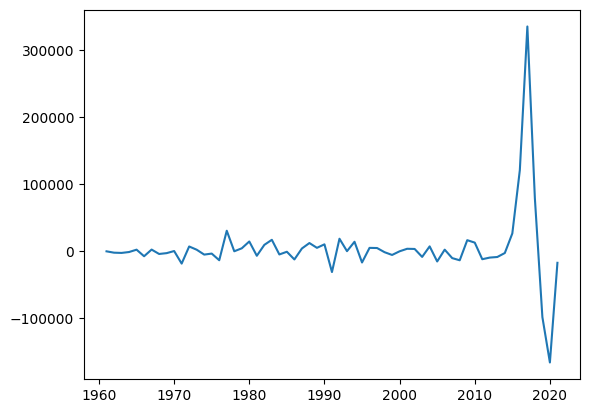

In [162]:
plt.plot(df_colombia['colombia First Difference'])
plt.show()

In [163]:
# parece que tenemos OUTLIERS veremos el desempeño del modelo SARIMA , si no es bueno, eliminaremos los outliers

### `Correlograma`

In [164]:
import statsmodels as sm

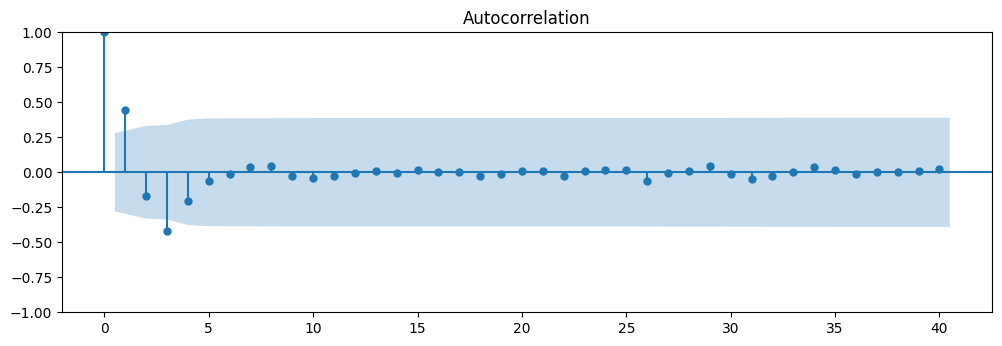

In [165]:
from statsmodels.graphics import tsaplots
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = tsaplots.plot_acf(df_colombia['colombia First Difference'].iloc[13:],lags=40,ax=ax1)

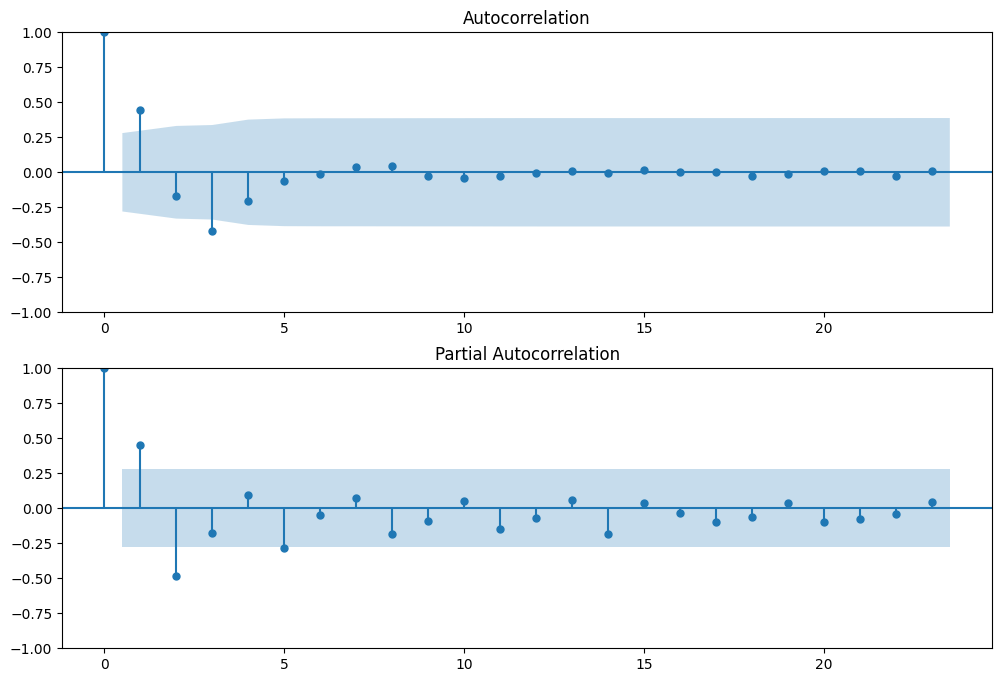

In [166]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = tsaplots.plot_acf(df_colombia['colombia First Difference'].iloc[13:],lags=23,ax=ax1)
ax2 = fig.add_subplot(212)
fig = tsaplots.plot_pacf(df_colombia['colombia First Difference'].iloc[13:],lags=23,ax=ax2)

In [167]:
# Tomaremos del acf el valor de q = 2 y del pacf el valor de p = 2 , en caso de que no funcione, probaremos con p = 1 y q = 1

#### **SARIMA MODEL**

In [168]:
from statsmodels.tsa.arima.model import ARIMA

In [169]:
# Para datos no estacionales

# En parámetro order debemos especificar p, d y q / en est caso p = 2, d = 1 y q = 2

model = ARIMA(df_colombia['colombia'],order=(2,1,2)) # Formula General \Delta y_t = \psi_1y_{t-1} + \delta_1e_{t-1} + e_t

model_fit=model.fit()

In [170]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               colombia   No. Observations:                   62
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -735.264
Date:                Sat, 20 May 2023   AIC                           1480.528
Time:                        12:46:56   BIC                           1491.082
Sample:                    01-01-1960   HQIC                          1484.664
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0338      0.401     -0.084      0.933      -0.820       0.752
ar.L2         -0.5283      0.267     -1.979      0.048      -1.051      -0.005
ma.L1          0.7294      0.410      1.780      0.075      -0.074       1.533
ma.L2          0.7726      0.192      4.017      0.000       0.396       1.150
sigma2      1.929e+09   7.64e-10   2.52e+18      0.000    1.93e+09    1.93e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1141.30
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              19.46   Skew:                             3.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.2e+34. Standard errors may be unstable.
"""

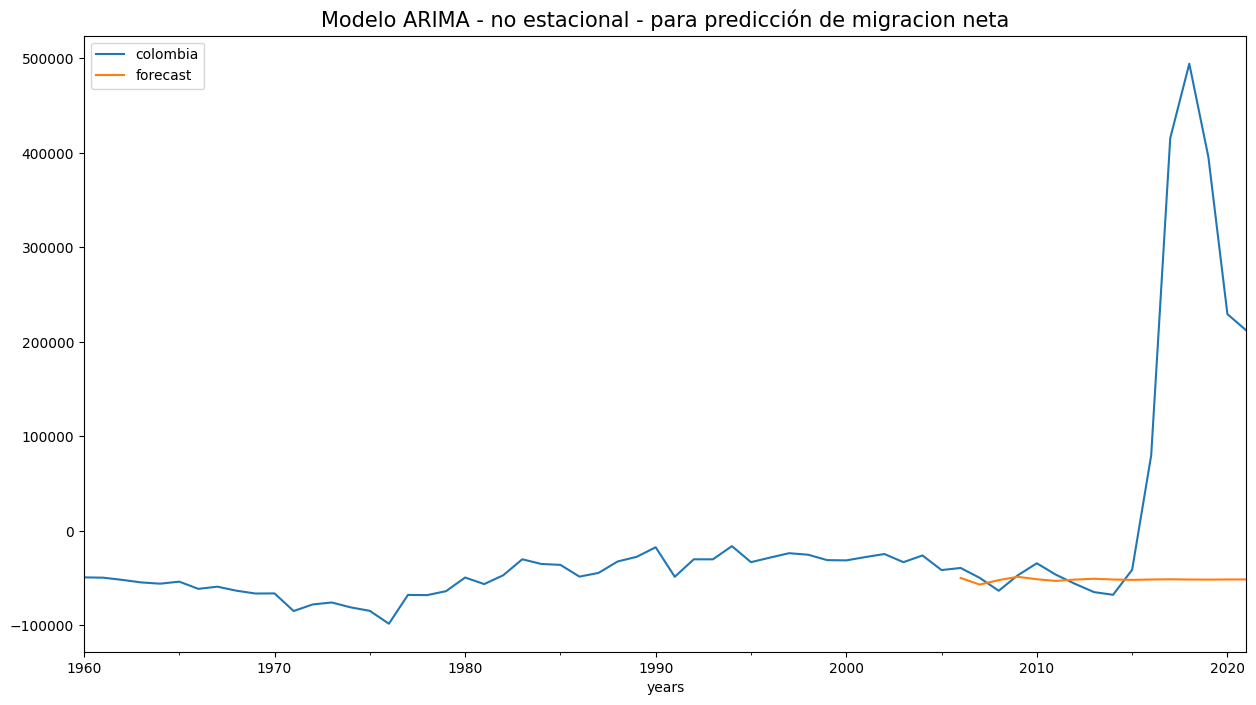

In [171]:
df_colombia['forecast']=model_fit.predict(start = 46, end = 61, dynamic = True)
df_colombia[['colombia','forecast']].plot(figsize=(15,8))
plt.title('Modelo ARIMA - no estacional - para predicción de migracion neta', fontsize = 15)
plt.show()

No estamos obteniendo buenos resultados usando ARIMA porque nuestros datos tienen un comportamiento estacional, así que intentemos usar ARIMA estacional.


In [172]:
import statsmodels as sm

In [173]:
# En el parámetro seasonal_orden debemos indicar = p estacional, d estacional, q estacional y periodicidad estacional

model=sm.tsa.statespace.sarimax.SARIMAX(df_colombia['colombia'],order=(2, 1, 2),seasonal_order=(2,1,2,5))
results=model.fit()

In [174]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                          colombia   No. Observations:                   62
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 5)   Log Likelihood                -677.643
Date:                           Sat, 20 May 2023   AIC                           1373.285
Time:                                   12:46:57   BIC                           1391.514
Sample:                               01-01-1960   HQIC                          1380.352
                                    - 01-01-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9119      1.837      0.496      0.620      -2.689       4.513
ar.L2         -0.7624      1.933     -0.394      0.693      -4.552       3.027
ma.L1         -0.2594      1.931     -0.134      0.893      -4.045       3.526
ma.L2          0.1971      1.982      0.099      0.921      -3.687       4.081
ar.S.L5       -0.6584      4.870     -0.135      0.892     -10.203       8.886
ar.S.L10       0.0056      1.993      0.003      0.998      -3.900       3.911
ma.S.L5        0.1222      4.957      0.025      0.980      -9.594       9.838
ma.S.L10      -0.5290      2.902     -0.182      0.855      -6.217       5.159
sigma2      2.285e+09   5.57e-09    4.1e+17      0.000    2.29e+09    2.29e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1210.77
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):              16.21   Skew:                             3.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.06e+34. Standard errors may be unstable.
"""

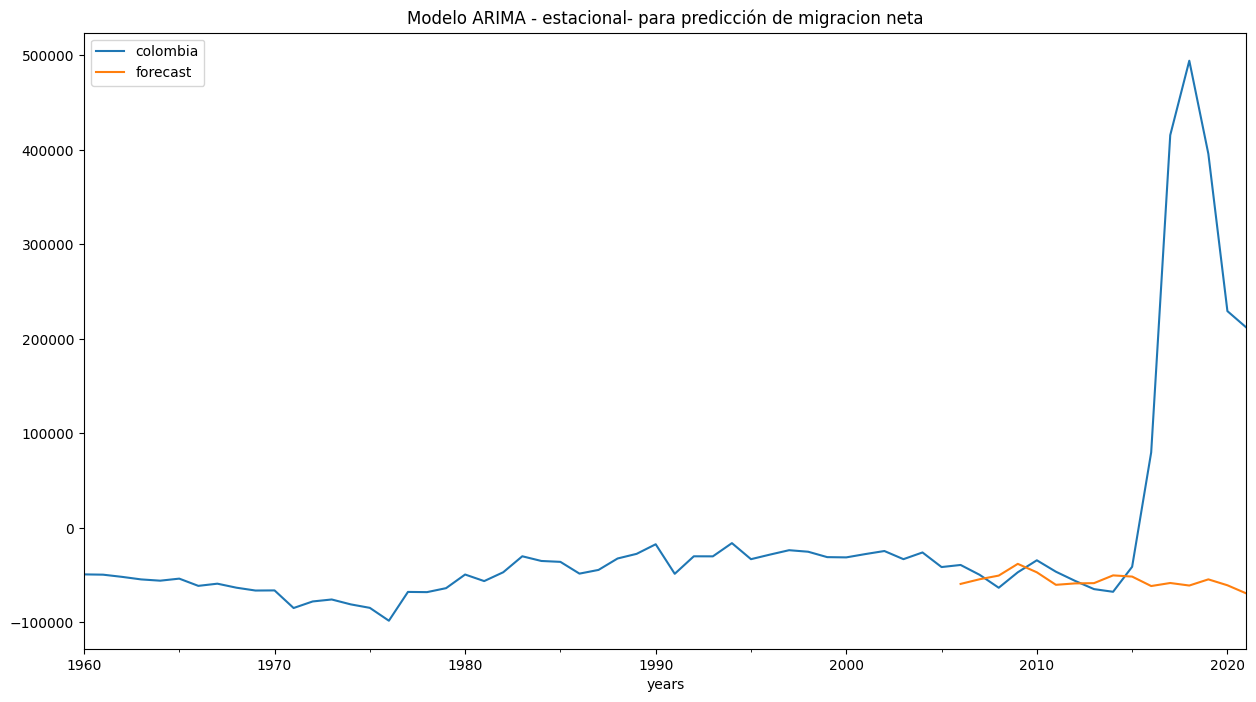

In [175]:
df_colombia['forecast']=results.predict(start=46,end=61,dynamic=True)
df_colombia[['colombia','forecast']].plot(figsize=(15,8))
plt.title('Modelo ARIMA - estacional- para predicción de migracion neta')
plt.show()

In [176]:
# Se aproxima mas que el modelo ARIMA no estacional, pero no es muy bueno, probaremos con p = 1 y q = 1 , pero antes seguiremos adelante para ver si podemos mejorar el modelo , recordemos que tenemos outliers

Realizaremos una predicción de ventas para los próximos 3 años.

In [177]:
# from pandas.tseries.offsets import DateOffset

# future_dates = [df_colombia.index[-1]+ DateOffset(year=x)for x in range(0,5)] # 5 años mas

from pandas.tseries.offsets import DateOffset

future_dates = [df_colombia.index[-1] + DateOffset(years=x) for x in range(1, 6)]  # 5 years ahead

In [178]:
future_datest_df = pd.DataFrame(index=future_dates[1:],columns=df_colombia.columns)

In [179]:
future_df = pd.concat([df_colombia,future_datest_df]) # Concatenamos los dos dataframes

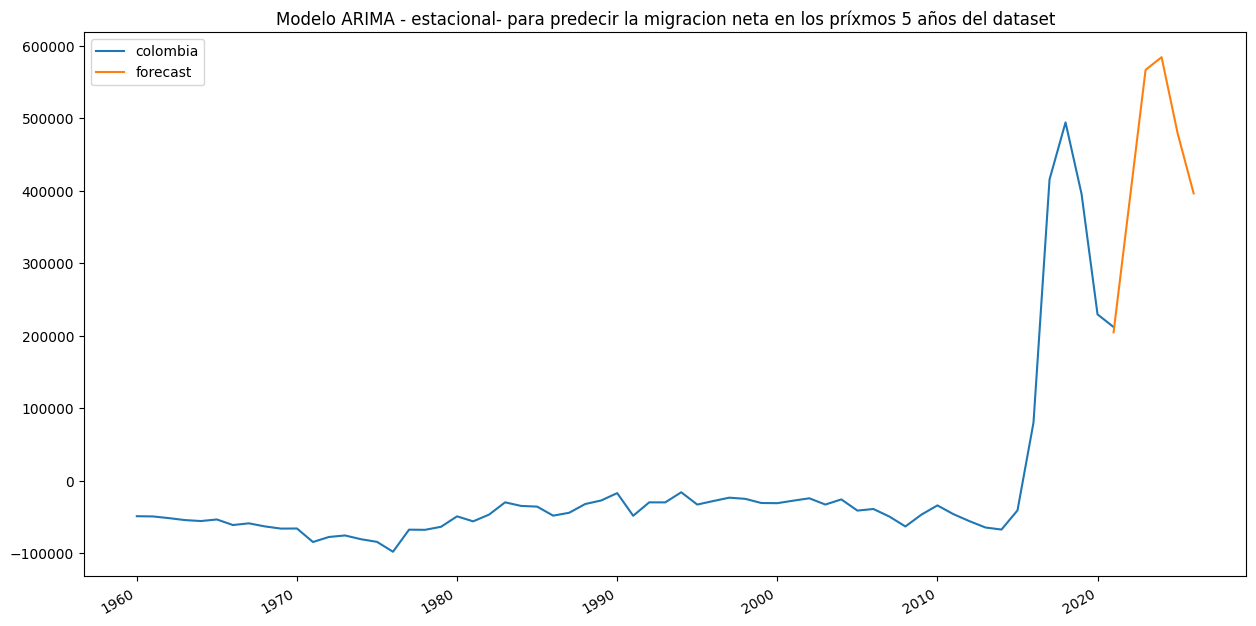

In [180]:
future_df['forecast'] = results.predict(start = 61, end = 67, dynamic= True)  
future_df[['colombia', 'forecast']].plot(figsize=(15, 8)) 
plt.title('Modelo ARIMA - estacional- para predecir la migracion neta en los príxmos 5 años del dataset')
plt.show()

In [181]:
# Hemos comaparado estos datos del SARIMAX con los datos reales y vemos que se aproxima a datos reales , aunque estadisticamente no es muy bueno, pero es mejor que el modelo ARIMA no estacional , asi que usaremos la libreria pmdarima para encontrar los mejores parametros para el modelo SARIMAX y SARIMA , y asi mejorar estos modelos y ver con cual conviene trabajar Y CON SUS RESPECTIVOS PARAMETROS OPTIMIZADOS

#### **AUTOMATIZACION EN LA BUSQUEDA DE PARAMETROS OPTIMIZADOS PARA MODELO TIPO ARIMA**

In [182]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings 
warnings.filterwarnings("ignore")


In [183]:
stepwise_fit = auto_arima(df_colombia['colombia'], trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1482.359, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1506.173, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1494.770, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1490.384, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1504.565, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1492.901, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1481.983, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1491.265, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1481.151, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1480.668, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1481.489, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1481.707, Time=0.09 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1483.489, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1479.910, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   62
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -735.955
Date:                Sat, 20 May 2023   AIC                           1479.910
Time:                        12:47:00   BIC                           1488.354
Sample:                    01-01-1960   HQIC                          1483.219
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5802      0.103      5.654      0.000       0.379       0.781
ar.L2         -0.3816      0.334     -1.144      0.253      -1.035       0.272
ar.L3         -0.1945      0.257     -0.755      0.450      -0.699       0.310
sigma2      1.822e+09   5.89e-10   3.09e+18      0.000    1.82e+09    1.82e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2042.46
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              20.15   Skew:                             4.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.38e+34. Standard errors may be unstable.
"""

In [194]:
# get the optimal parameters
optimal_p = stepwise_fit.order[0]
optimal_d = stepwise_fit.order[1]
optimal_q = stepwise_fit.order[2]

print(f"Optimal p: {optimal_p}, Optimal d: {optimal_d}, Optimal q: {optimal_q}")

Optimal p: 3, Optimal d: 1, Optimal q: 0


In [ ]:
# Esto nos dice que el P debe ser 3 , el d(diferenciacion) debe ser 1 

In [184]:
# Podemos ver que el mejor modelo es ARIMA(3,1,0)(0,0,0)[0]  que indica que no hay componente estacional , lo cual nos indica que el modelo SARIMA no es el mejor para este caso ,sino el modelo ARIMA , asi que trabajaremos con el modelo ARIMA

SPLIT DATA PARA EL TRAINING Y TESTING

In [185]:
print(df_colombia.shape)
train = df_colombia.iloc[:46]
test = df_colombia.iloc[46:]
print(train.shape,test.shape)

(62, 3)
(46, 3) (16, 3)


ENTRENAREMOS NUESTRO MODELO ARIMA 

In [186]:
model = ARIMA(df_colombia['colombia'],order=(3,1,0))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               colombia   No. Observations:                   62
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -735.955
Date:                Sat, 20 May 2023   AIC                           1479.910
Time:                        12:47:00   BIC                           1488.354
Sample:                    01-01-1960   HQIC                          1483.219
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5802      0.103      5.654      0.000       0.379       0.781
ar.L2         -0.3816      0.334     -1.144      0.253      -1.035       0.272
ar.L3         -0.1945      0.257     -0.755      0.450      -0.699       0.310
sigma2      1.822e+09   5.89e-10   3.09e+18      0.000    1.82e+09    1.82e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2042.46
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              20.15   Skew:                             4.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.38e+34. Standard errors may be unstable.
"""

EMPEZAMOS LAS PREDICCIONES PARA EL TESTSET

In [187]:
start=len(train)
end = len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,typ='levels')
print(pred)
#pred.index=df_colombia.index[start:end+1]
#print(pred)

2006-01-01    -51337.750343
2007-01-01    -33351.329358
2008-01-01    -53466.716545
2009-01-01    -67626.055441
2010-01-01    -30173.890552
2011-01-01    -30383.992784
2012-01-01    -61317.444952
2013-01-01    -59367.125607
2014-01-01    -63746.775059
2015-01-01    -63935.618397
2016-01-01    -22930.645544
2017-01-01    140663.098963
2018-01-01    559024.477894
2019-01-01    388443.491633
2020-01-01    243292.940758
2021-01-01    155204.041195
Freq: AS-JAN, Name: predicted_mean, dtype: float64


<AxesSubplot: xlabel='years'>

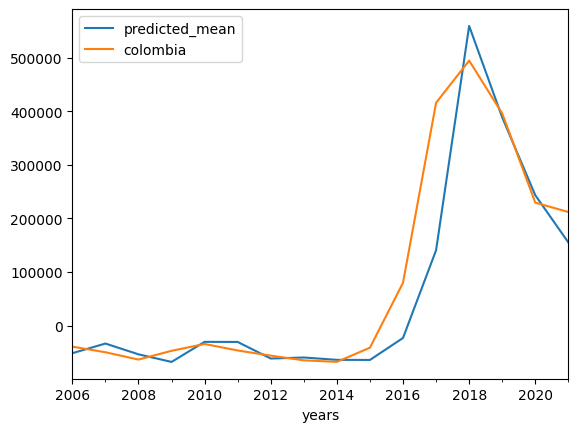

In [188]:
pred.plot(legend=True)
test['colombia'].plot(legend=True)

In [189]:
test['colombia'].mean()

82417.25

#### **MEDIANTE LAS METRICAS PODREMOS VER EL GRADO DE PRESICION DEL MODELO**

In [190]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['colombia']))
print(rmse)

77314.78951676986


In [191]:
from sklearn.metrics import r2_score
r2 = r2_score(pred,test['colombia'])
r2

0.8226077574391686

In [192]:
model2 = ARIMA(train['colombia'],order=(3,1,0))
model2_fit=model2.fit()
df_colombia.tail()

,colombia,colombia First Difference,forecast
years,,,
2017-01-01,415618.0,335640.0,-58217.666495
2018-01-01,494364.0,78746.0,-60900.204914
2019-01-01,395803.0,-98561.0,-54373.291043
2020-01-01,229437.0,-166366.0,-60624.922654
2021-01-01,211978.0,-17459.0,-69306.120764


PARA PREDICCIONES FUTURAS

In [193]:
index_future_dates=pd.date_range(start='2019-01-01',end='2024-01-01')
#print(index_future_dates)
pred=model2_fit.predict(start=len(df_colombia),end=len(df_colombia)+60,typ='levels').rename('ARIMA Predictions')
#print(pred)
#pred.index=index_future_dates
print(pred)

2022-01-01   -37501.952847
2023-01-01   -37501.963429
2024-01-01   -37501.958471
2025-01-01   -37501.960812
2026-01-01   -37501.959717
                  ...     
2078-01-01   -37501.960065
2079-01-01   -37501.960065
2080-01-01   -37501.960065
2081-01-01   -37501.960065
2082-01-01   -37501.960065
Freq: AS-JAN, Name: ARIMA Predictions, Length: 61, dtype: float64


#### **ESTE MODELO ES EL QUE TIENE EL MEJOR DESEMPEÑO EN GENERAL PARA LOSDATASETS ASI QUE SE AUTOMATIZARA CON PMDARIMA - AUTOARIMA Y SE APLICARA A TODOS LOS DATASETS PARA ENTRENAR LOS MODELOS DE PREDICCION DE SERIES DE TIEMPO**